In [19]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np

from salishsea_tools.nc_tools import scDataset

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<h1 id="tocheading"> Contents </h1>
<div id="toc"></div>

In [20]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [21]:
def get_files(dirname, fname, grid):
    files = []    
    for item in os.listdir(dirname):
        if fnmatch.fnmatchcase(item, fname + grid + "*.nc"):
            files += [os.path.join(dirname, item)]
    files.sort(key=os.path.basename)
    return files

# ------------------------------------------------------------------------------------------------
def get_vars(dirname, version):
    '''from analysis-michael/raw/tip/notebooks/FraserFlow.ipynb
    '''
    if version == 'parent':
        fname = "MCKNZ_1h_20170101_20170120_*"
    elif version == 'child':
        fname = "1_MCKNZ_1h_20170101_20170120_*"
    
    s = slice(1,-1,None)
    time_ind = 300
    
    filesT = get_files(dirname, fname, 'grid_T')
    filesU = get_files(dirname, fname, 'grid_U')        
    filesV = get_files(dirname, fname, 'grid_V')
    filesW = get_files(dirname, fname, 'grid_W')
            
    with scDataset(filesT) as dsT, scDataset(filesU) as dsU, scDataset(filesV) as dsV, scDataset(filesW) as dsW:
        lat = dsT.variables['nav_lat'][s,s]
        lon = dsT.variables['nav_lon'][s,s]
        deptht = dsT.variables['deptht'][:]
        sossheig = dsT.variables['sossheig'][time_ind,s,s]
        votemper = dsT.variables['votemper'][time_ind,:,s,s]
        vozocrtx = dsU.variables['vozocrtx'][time_ind,:,s,s]
        sozotaux = dsU.variables['sozotaux'][:,s,s]
        vomecrty = dsV.variables['vomecrty'][time_ind,:,s,s]
        sometauy = dsV.variables['sometauy'][:,s,s]
        vovecrtz = dsW.variables['vovecrtz'][time_ind,:,s,s]
    
    return lat, lon, deptht, sossheig, votemper, vozocrtx, sozotaux, vomecrty, sometauy, vovecrtz

# ------------------------------------------------------------------------------------------------
def plot_varb(fig, axa, axb, varb, depth_ind, vm, cmap, ttl, version):
    cmap.set_bad('wheat')
    if version == 'parent':
        cross_ind = int(varb.shape[-1]/2)
    elif version == 'child':
        cross_ind = 110
    
    if vm ==None:
        vmin, vmax = varb[:,:,cross_ind].min(), varb[:,:,cross_ind].max()
    else:  
        vmin, vmax = -1*vm, vm
           
    pa = axa.pcolormesh(varb[depth_ind,:,:], vmin=vmin, vmax=vmax, cmap=cmap)
    pb = axb.pcolormesh(varb[:,:,cross_ind], vmin=vmin, vmax=vmax, cmap=cmap)
    
    axa.axvline(cross_ind, c='k', linewidth=4)
    axb.axhline(depth_ind, c='k', linewidth=4)

    axa.set_xlim([0, varb.shape[-1]]); axa.set_ylim([0, varb.shape[-2]])
    axb.set_xlim([0, varb.shape[-2]]); axb.set_ylim([varb.shape[-3], 0])
    axa.set_title(ttl+': Top View', fontsize=24)
    axb.set_title(ttl+': Cross Section', fontsize=24)
    
    fig.colorbar(pa, ax=axa)
    fig.colorbar(pb, ax=axb)
    return axa, axb

# ------------------------------------------------------------------------------------------------
def plot_cross_section(u_vel, v_vel, w_vel, notemper, depth_ind, suptitle, version, vmb):

    fig, ([ax1, ax2],[ax3, ax4],[ax5, ax6], [ax7, ax8]) = plt.subplots(4,2, figsize=(20, 24))
    plt.tight_layout(h_pad=8, w_pad=3)
    plt.subplots_adjust(top=0.93)
    plt.suptitle(suptitle, fontsize=30)

    cmap = plt.get_cmap(cm.RdBu_r)
    ax1, ax2 = plot_varb(fig, ax1, ax2, u_vel, depth_ind, vmb[0], cmap, 'U vel', version)
    ax3, ax4 = plot_varb(fig, ax3, ax4, v_vel, depth_ind, vmb[1], cmap, 'V vel', version)
    ax5, ax6 = plot_varb(fig, ax5, ax6, w_vel, depth_ind, vmb[2], cmap, 'W vel', version)

    cmap = plt.get_cmap(cm.RdBu_r)
    ax7, ax8 = plot_varb(fig, ax7, ax8, notemper, depth_ind, None, cmap, 'Temperature', version)

    return fig

# ------------------------------------------------------------------------------------------------
def plot_profiles(vozocrtx, version, d_inds, vm):
    fig, ax = plt.subplots(3,3,figsize=(20, 12), sharex=True, sharey=True)
    plt.tight_layout(h_pad=2, w_pad=2)
    plt.subplots_adjust(top=0.92)
    plt.suptitle(version + ' grid: u velocity at different depth indices', fontsize=30)

    ax = ax.flatten()
    for n, d_ind in zip(np.arange(9), d_inds):
        ax[n].pcolormesh(vozocrtx[d_ind,:,:], vmin=-1*vm, vmax=vm, cmap=cm.RdBu_r)
        ax[n].set_ylim([0, vozocrtx.shape[-2]]); ax[n].set_xlim([0, vozocrtx.shape[-1]])
        ax[n].set_title(str(d_ind), fontsize=20)
    return fig

# Issue at the northern wall of child

In [22]:
dirname='/home/mdunphy/Canyons/Results/Ideal4T2/'
version = 'parent'
latP, lonP, depthtP, sossheigP, votemperP, vozocrtxP, sozotauxP, vomecrtyP, sometauyP, vovecrtzP = get_vars(dirname, version)

dirname='/home/mdunphy/Canyons/Results/Ideal4T2/'
version = 'child'
latC, lonC, depthtC, sossheigC, votemperC, vozocrtxC, sozotauxC, vomecrtyC, sometauyC, vovecrtzC = get_vars(dirname, version)

### Depth Profiles: Parent and Child, Top and Bottom

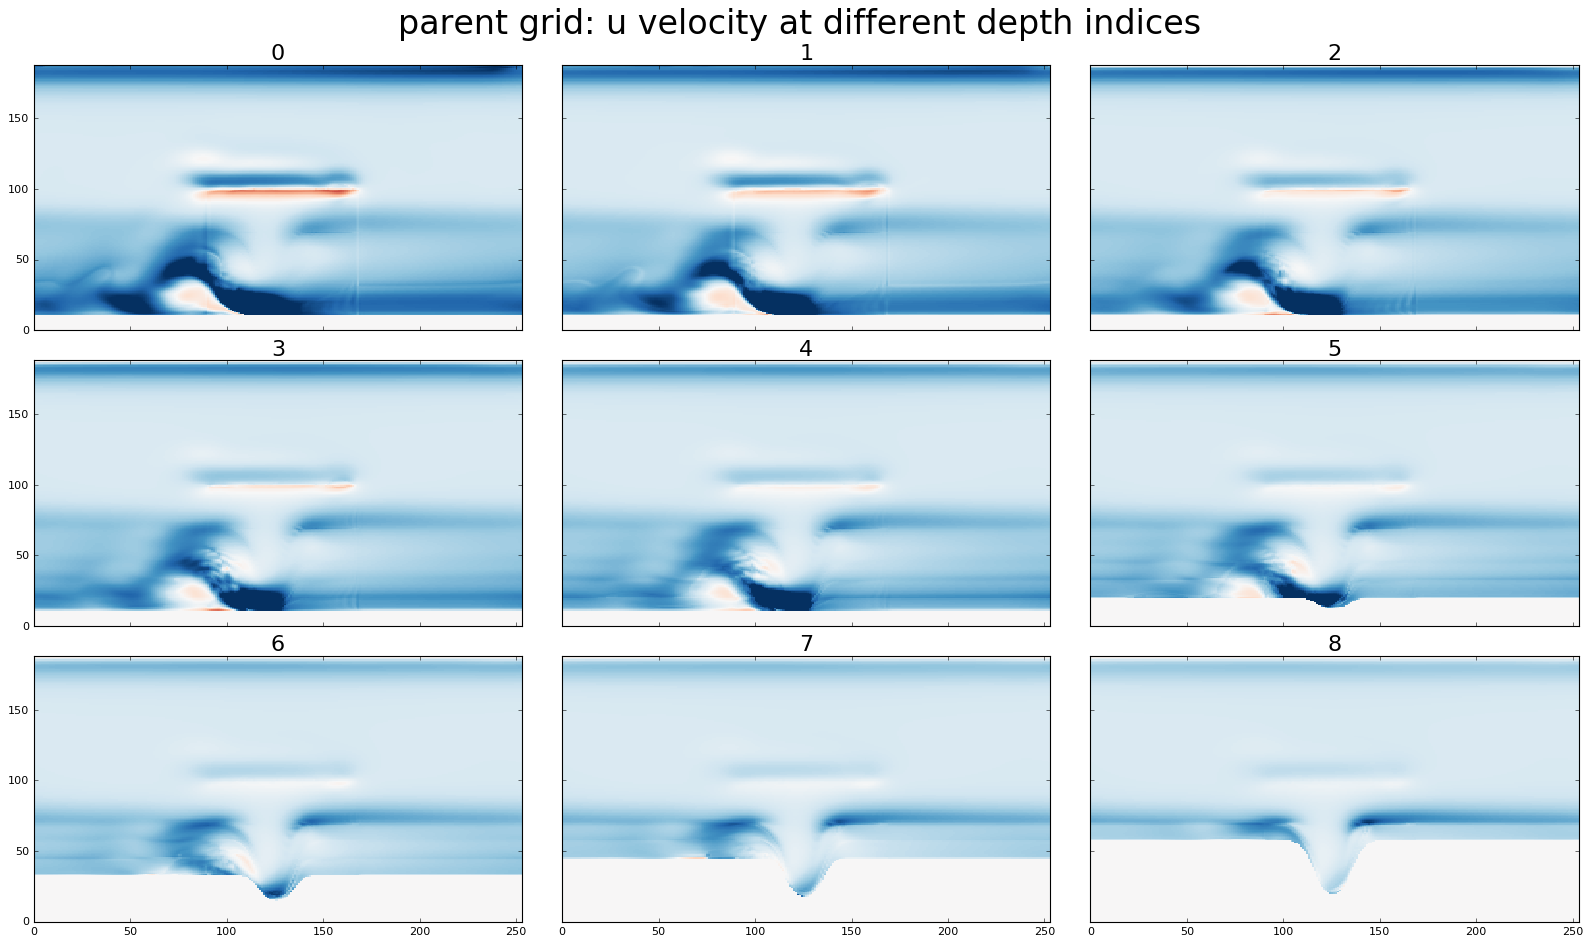

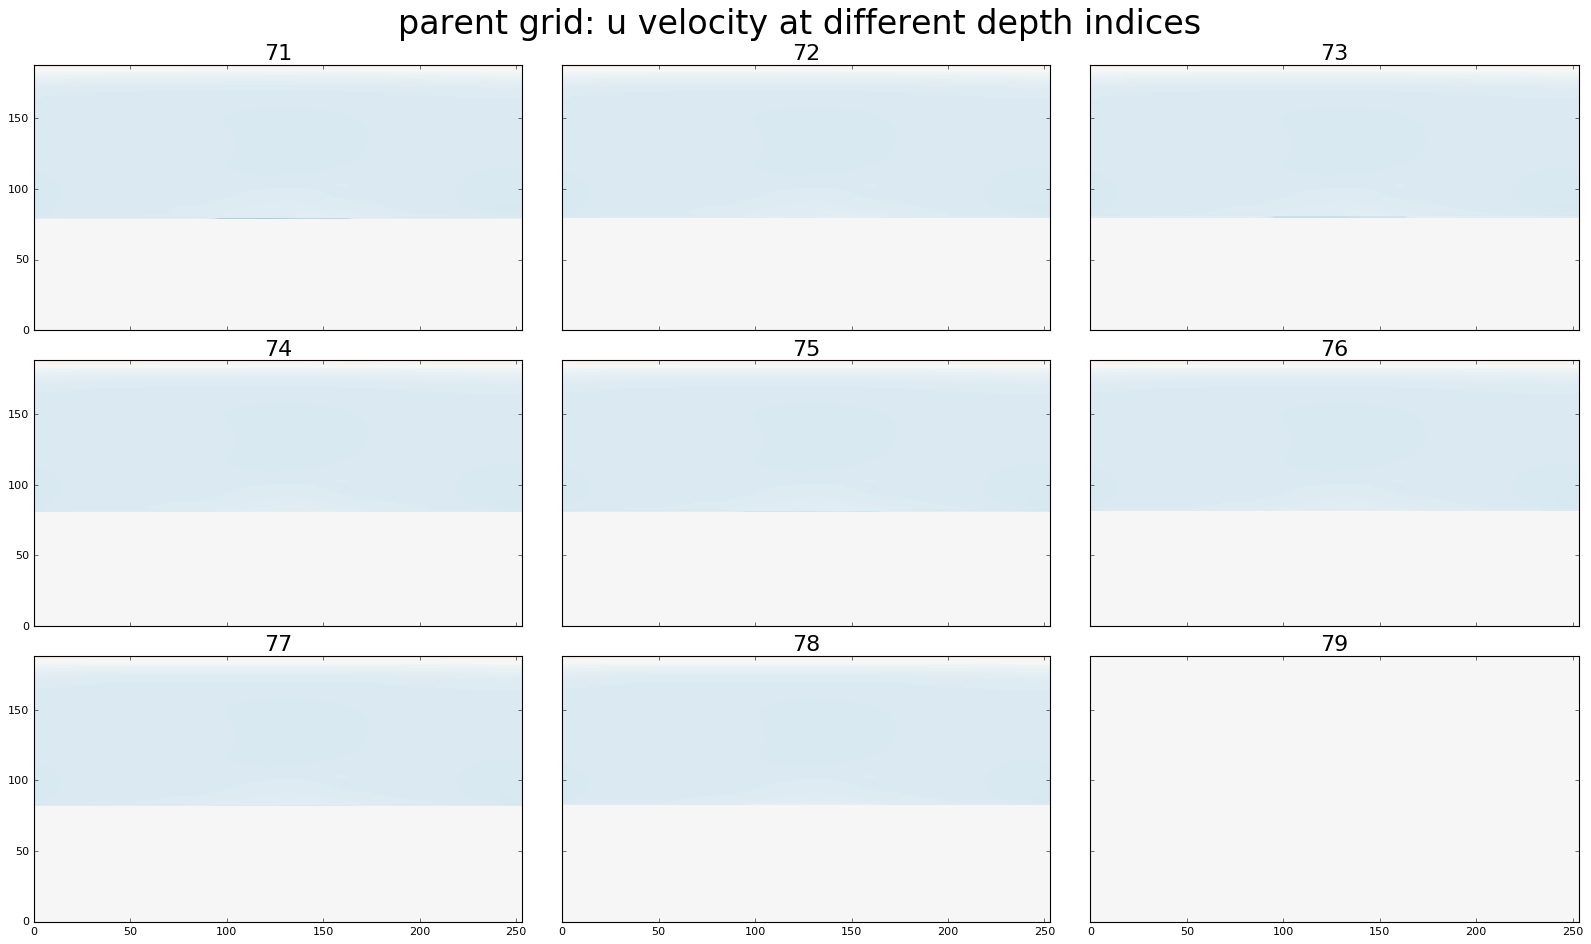

In [23]:
vm = 0.4
fig = plot_profiles(vozocrtxP, 'parent', np.arange(9), vm)
fig = plot_profiles(vozocrtxP, 'parent', np.arange(71, 80), vm)

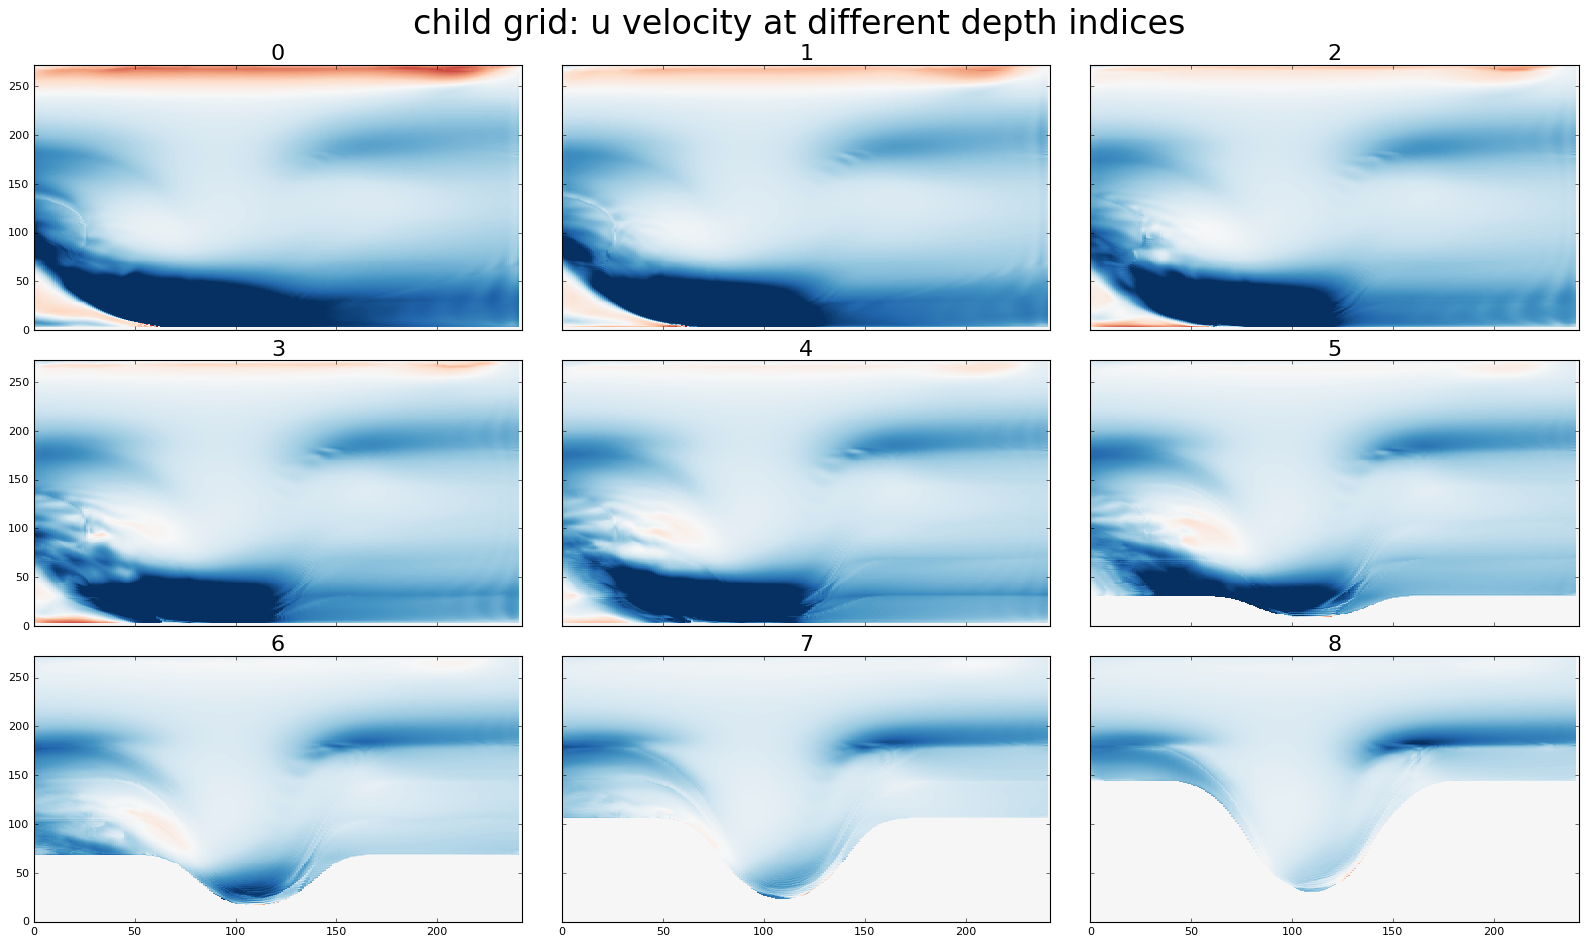

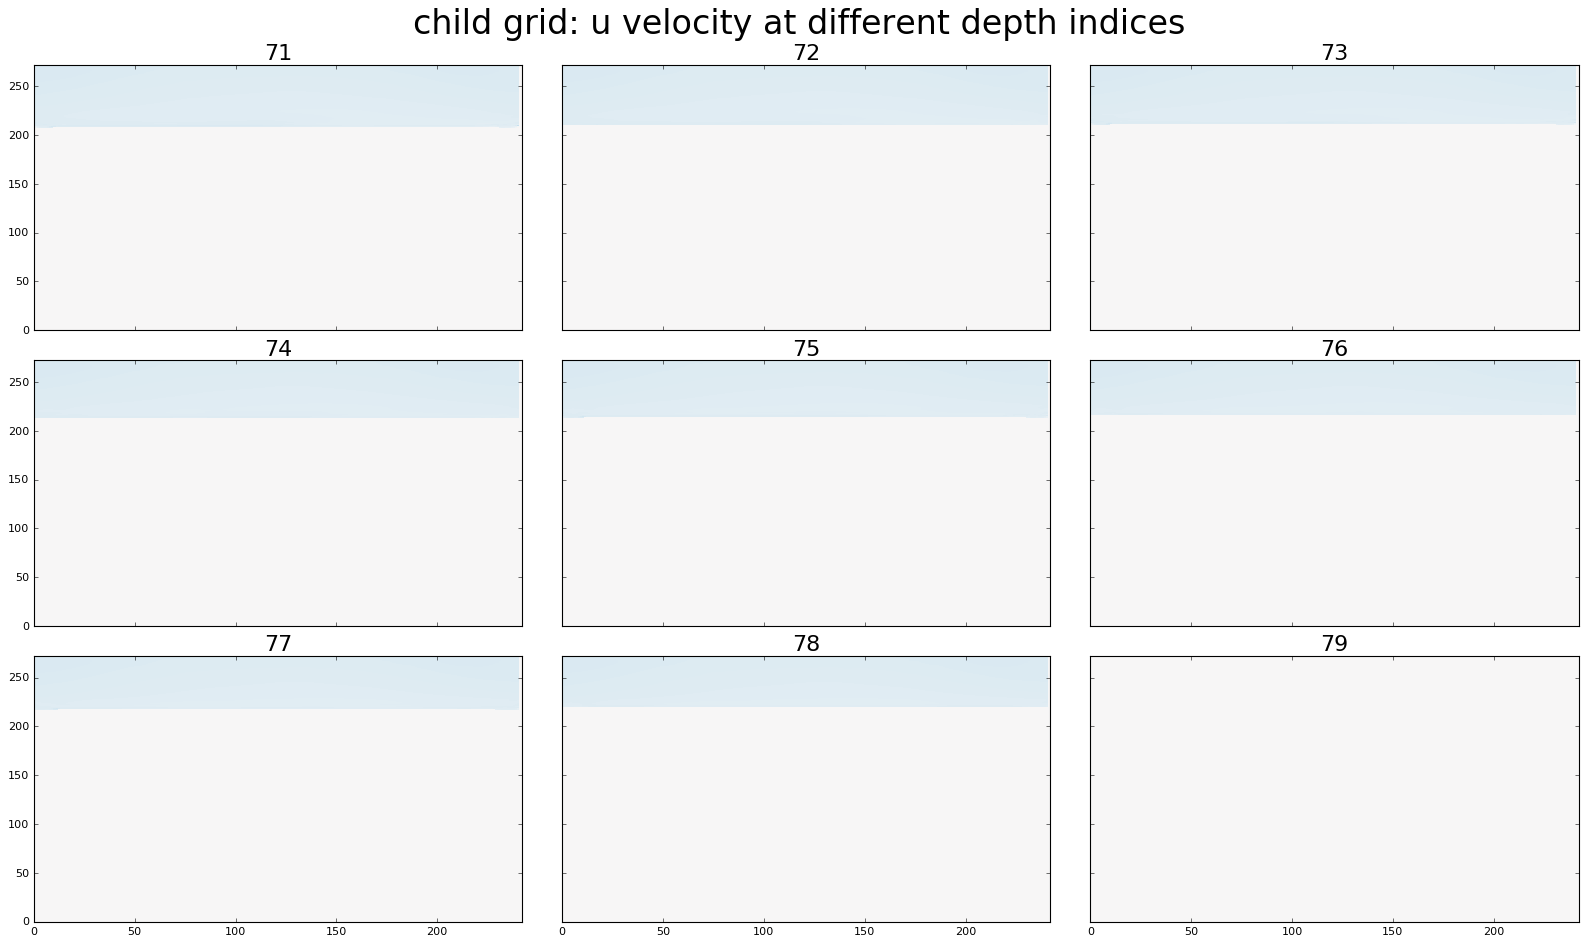

In [24]:
fig = plot_profiles(vozocrtxC, 'child', np.arange(9), vm)
fig = plot_profiles(vozocrtxC, 'child', np.arange(71, 80), vm)

### Cross-sections: Parent and Child, U, V, W, Temperature

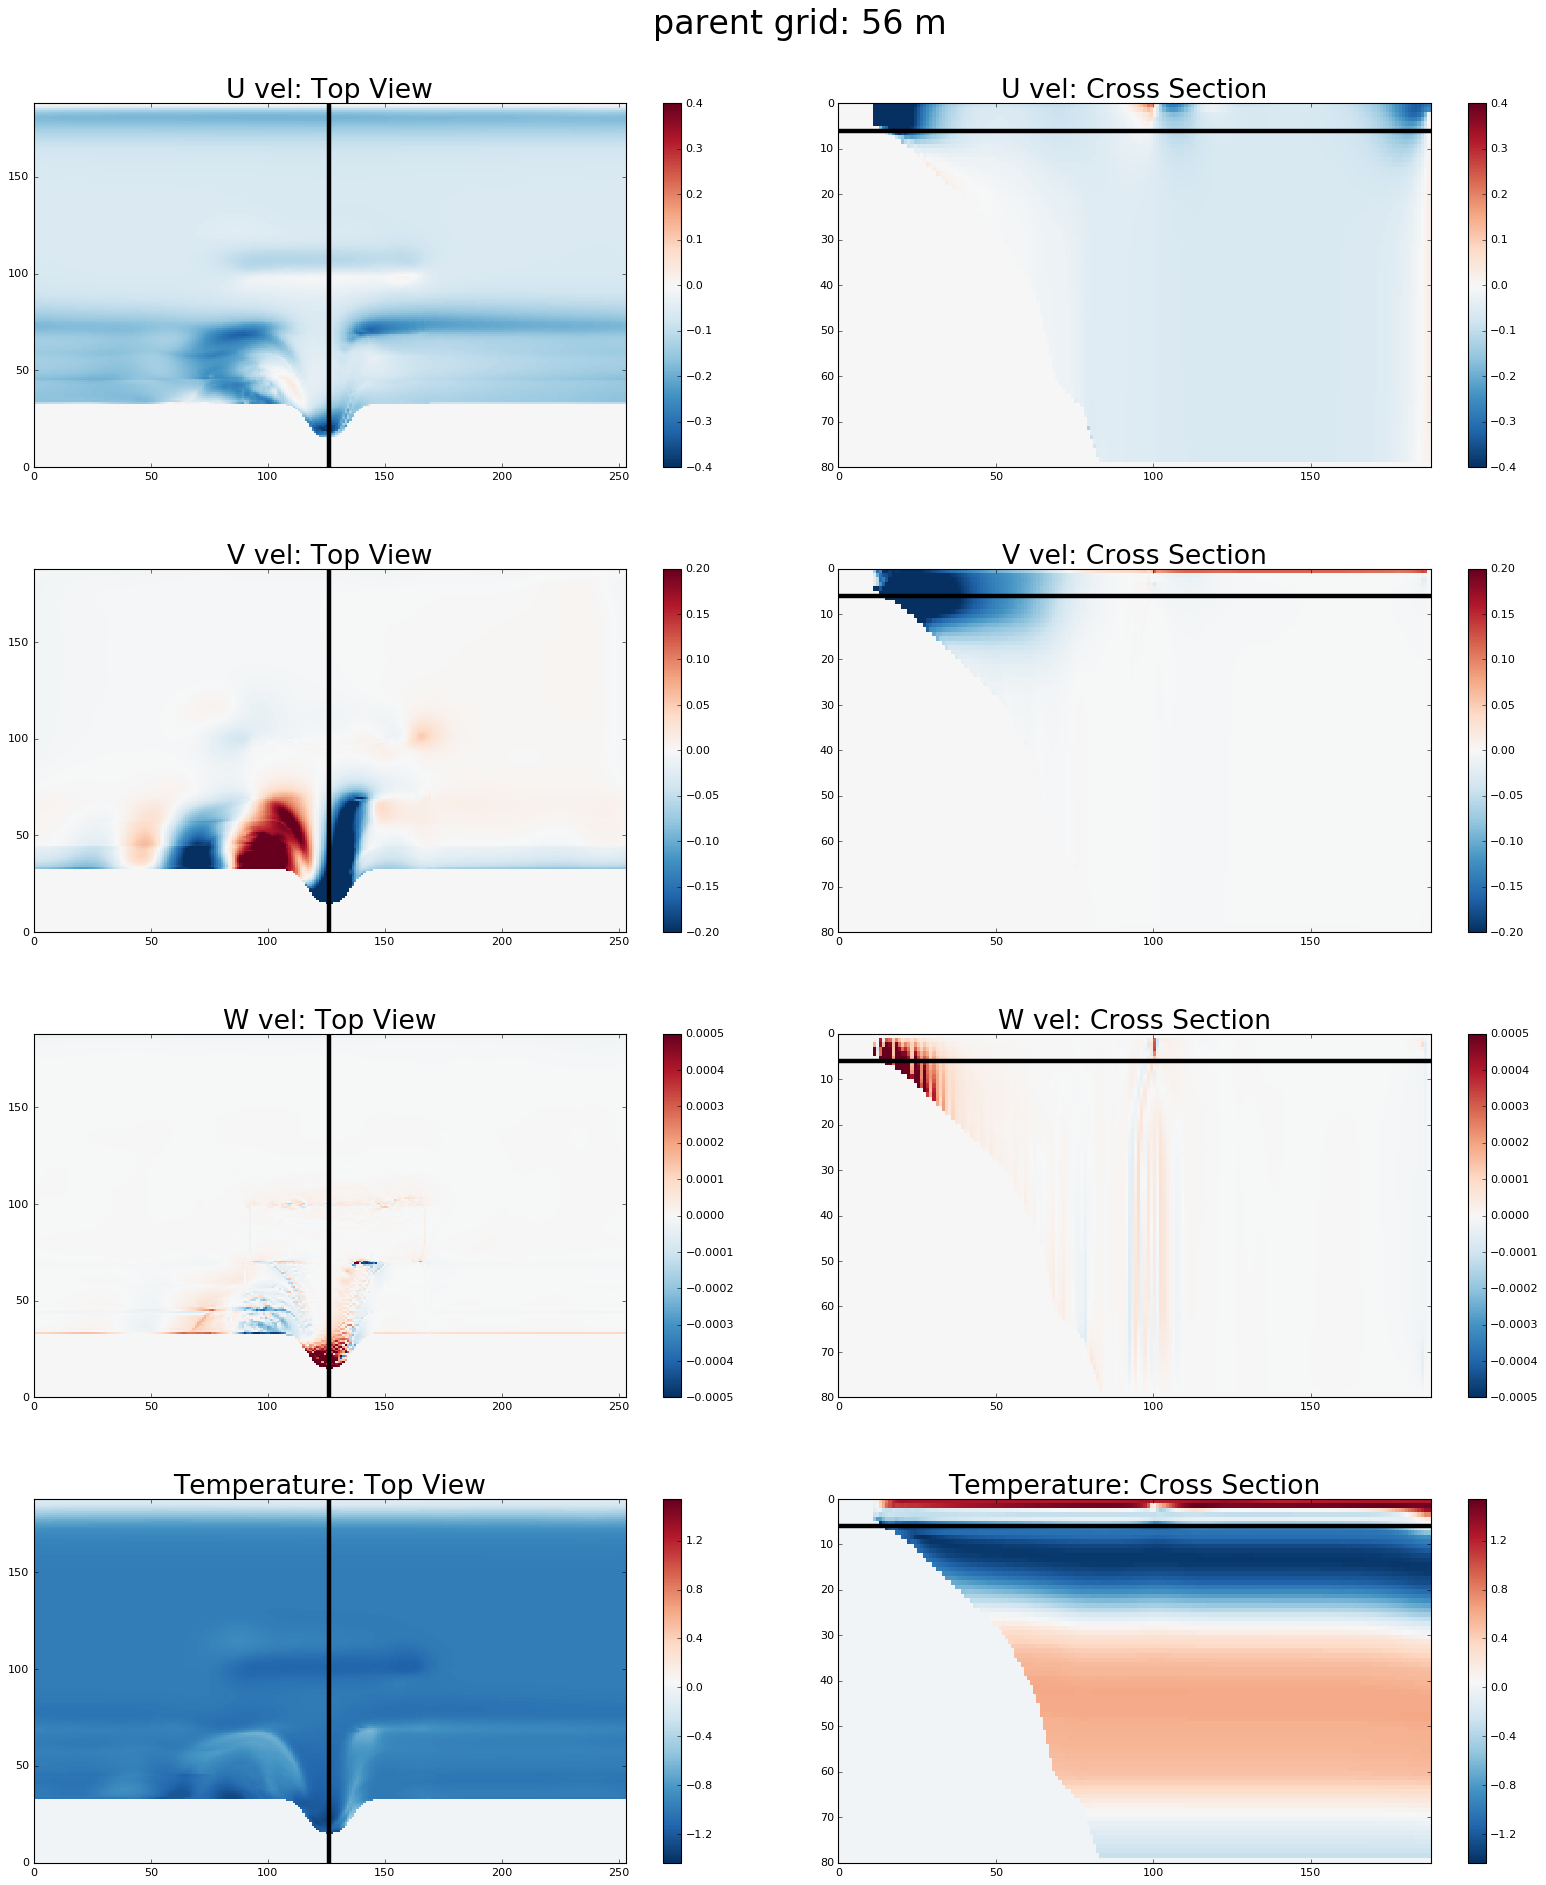

In [25]:
vmb = [0.4, 0.2, 0.0005]

version = 'parent'
depth_ind = 6
suptitle = version + ' grid: ' + str(int(depthtP[depth_ind])) + ' m'
fig = plot_cross_section(vozocrtxP, vomecrtyP, vovecrtzP, votemperP, depth_ind, suptitle, version, vmb)

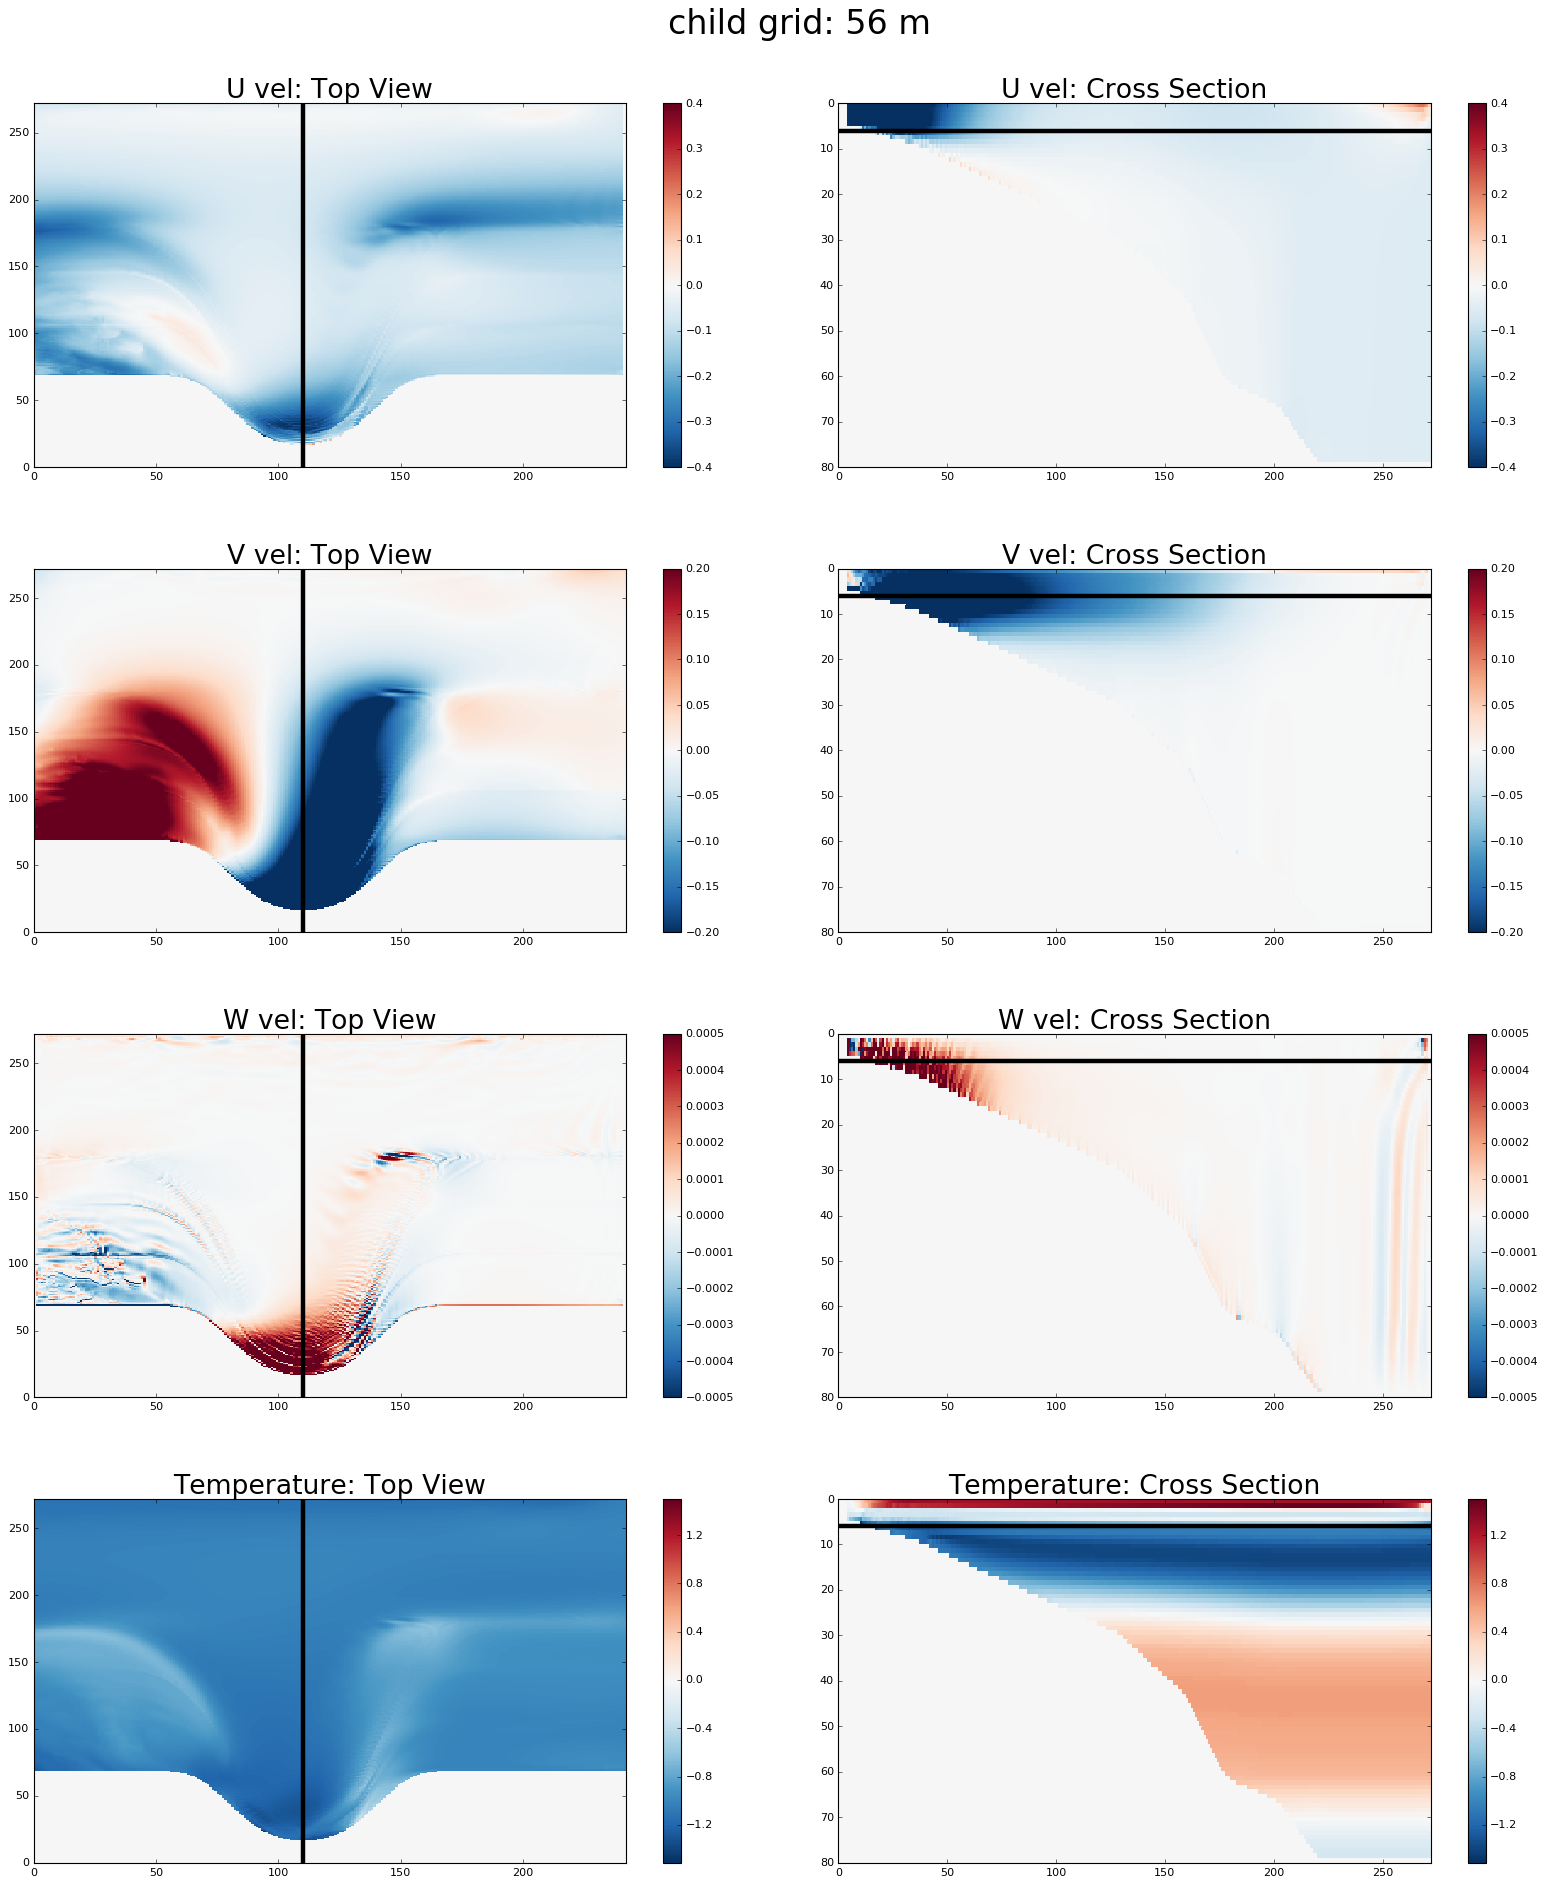

In [26]:
version = 'child'
depth_ind = 6
suptitle = version + ' grid: ' + str(int(depthtC[depth_ind])) + ' m'
fig = plot_cross_section(vozocrtxC, vomecrtyC, vovecrtzC, votemperC, depth_ind, suptitle, version, vmb)

### Closer look at U

```python
90 170 10 100 3 3 3 3
# imin imax jmin jmax spacerefx spacerefy timerefx timerefy
```

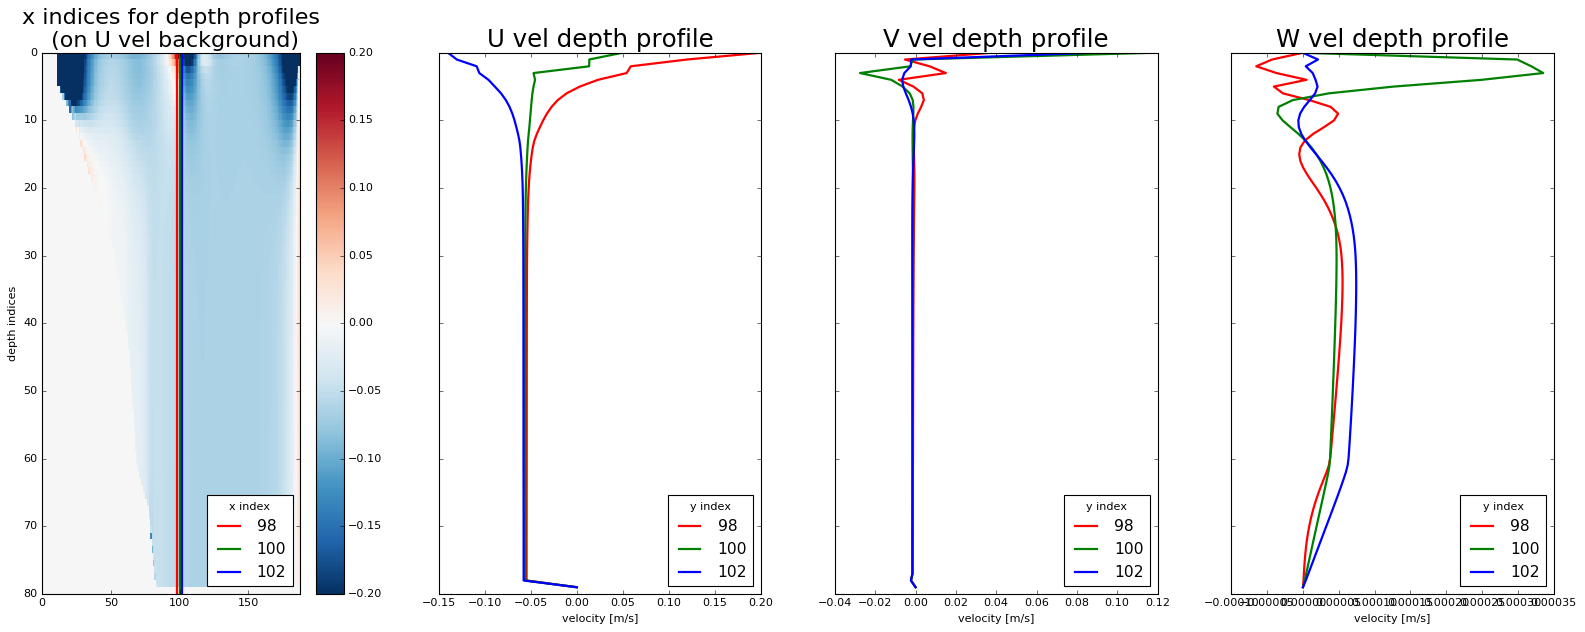

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20, 8), sharey=True)
cross_indP = int(vozocrtxP.shape[-1]/2)
ys = [98, 100, 102]    
p = ax1.pcolormesh(vozocrtxP[:,:,cross_indP], vmin=-0.2, vmax=0.2, cmap=plt.get_cmap(cm.RdBu_r))
ax1.axvline(ys[0], linewidth=2, c='r', label=str(ys[0]))
ax1.axvline(ys[1], linewidth=2, c='g', label=str(ys[1]))
ax1.axvline(ys[2], linewidth=2, c='b', label=str(ys[2]))
ax1.invert_yaxis()
fig.colorbar(p, ax=ax1)
ax1.set_ylabel('depth indices')
ax1.set_label('y indices')
ax1.legend(loc=4, title='x index', fontsize=14)
ax1.set_xlim([0, vozocrtxP.shape[1]])
ax1.set_title('x indices for depth profiles\n (on U vel background)', fontsize=20)

for ax, vel, ttl in zip([ax2, ax3, ax4], [vozocrtxP, vomecrtyP, vovecrtzP], ['U', 'V', 'W']):
    ax.plot(vel[:,ys[0],cross_indP], np.arange(vel.shape[0]), linewidth=2, c='r', label=str(ys[0]))
    ax.plot(vel[:,ys[1],cross_indP], np.arange(vel.shape[0]), linewidth=2, c='g', label=str(ys[1]))
    ax.plot(vel[:,ys[2],cross_indP], np.arange(vel.shape[0]), linewidth=2, c='b', label=str(ys[2]))
    ax.set_xlabel('velocity [m/s]')
    ax.legend(loc=4, title='y index', fontsize=14)
    ax.set_title(ttl + ' vel depth profile', fontsize=22)
plt.tight_layout(w_pad=3)

### SSH and Winds

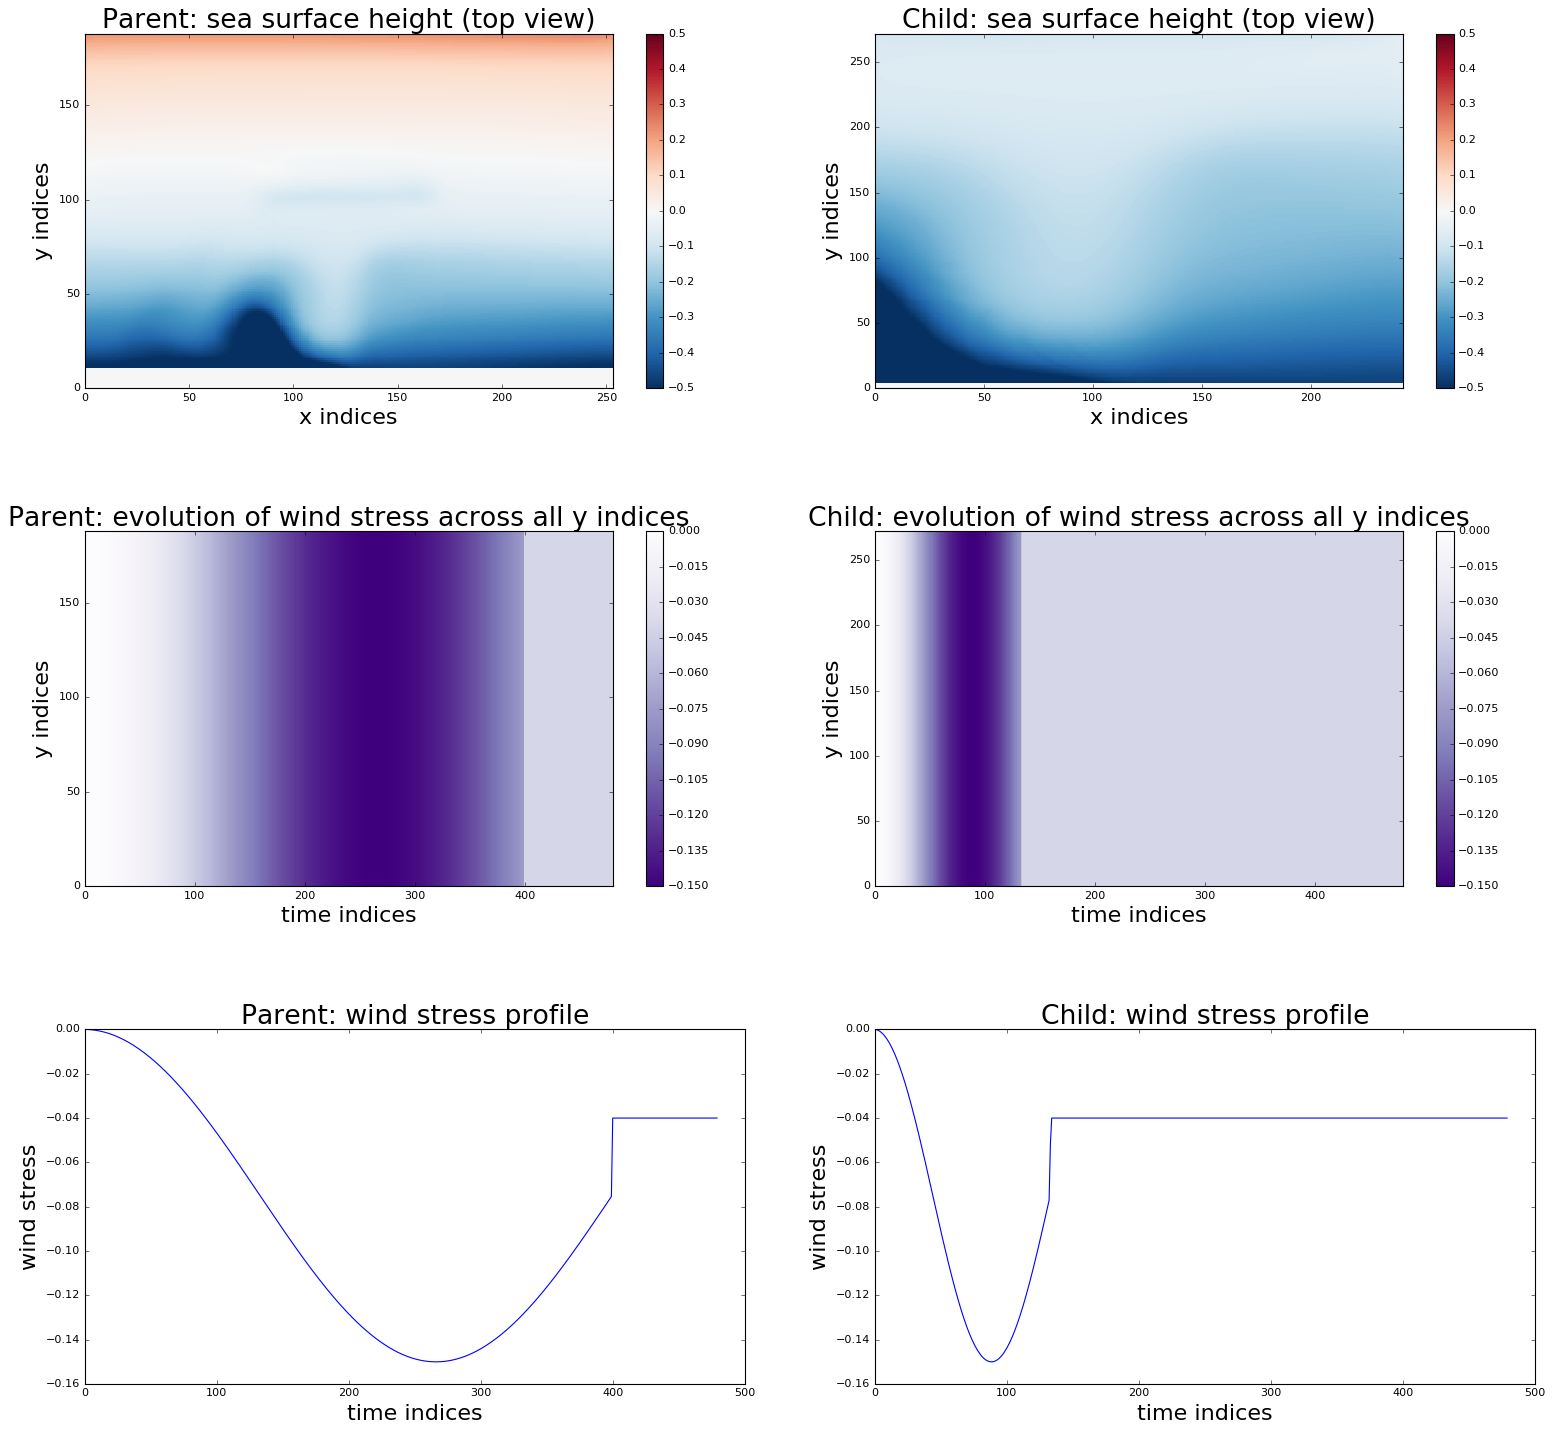

In [28]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3,2,figsize=(20, 18))

for ax, ssh, version in zip([ax1, ax2], [sossheigP, sossheigC], ['Parent', 'Child']):
    cmap = plt.get_cmap(cm.RdBu_r)
    p = ax.pcolormesh(ssh[:,:], vmin=-0.5, vmax=0.5, cmap=cmap)
    ax.set_xlabel('x indices', fontsize=20)
    ax.set_ylabel('y indices', fontsize=20)
    ax.set_xlim([0, ssh.shape[-1]])
    ax.set_ylim([0, ssh.shape[0]])
    fig.colorbar(p, ax=ax)
    ax.set_title(version + ': sea surface height (top view)', fontsize=24)

for ax, stress, version in zip([ax3, ax4], [sozotauxP, sozotauxC], ['Parent', 'Child']):    
    cmap = plt.get_cmap(cm.Purples_r)
    cross_ind = int(stress.shape[-1]/2)
    p = ax.pcolormesh(np.transpose(stress[:, :, cross_ind]), vmin=0, vmax=-0.15, cmap=cmap)
    ax.set_xlabel('time indices', fontsize=20)
    ax.set_ylabel('y indices', fontsize=20)
    ax.set_xlim([0, stress.shape[0]])
    ax.set_ylim([0, stress.shape[1]])
    fig.colorbar(p, ax=ax)
    ax.set_title(version + ': evolution of wind stress across all y indices', fontsize=24)
    
for ax, stress, version in zip([ax5, ax6], [sozotauxP, sozotauxC], ['Parent', 'Child']): 
    ax.plot(stress[:, 100, cross_ind])
    ax.set_xlabel('time indices', fontsize=20)
    ax.set_ylabel('wind stress', fontsize=20)
    ax.set_title(version + ': wind stress profile', fontsize=24)
    
plt.tight_layout(h_pad=7, w_pad=2)

# After fixing parent/child winds in sbcana

In [29]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'
version = 'parent'
latP, lonP, depthtP, sossheigP, votemperP, vozocrtxP, sozotauxP, vomecrtyP, sometauyP, vovecrtzP = get_vars(dirname, version)

version = 'child'
latC, lonC, depthtC, sossheigC, votemperC, vozocrtxC, sozotauxC, vomecrtyC, sometauyC, vovecrtzC = get_vars(dirname, version)

### SSH and Winds

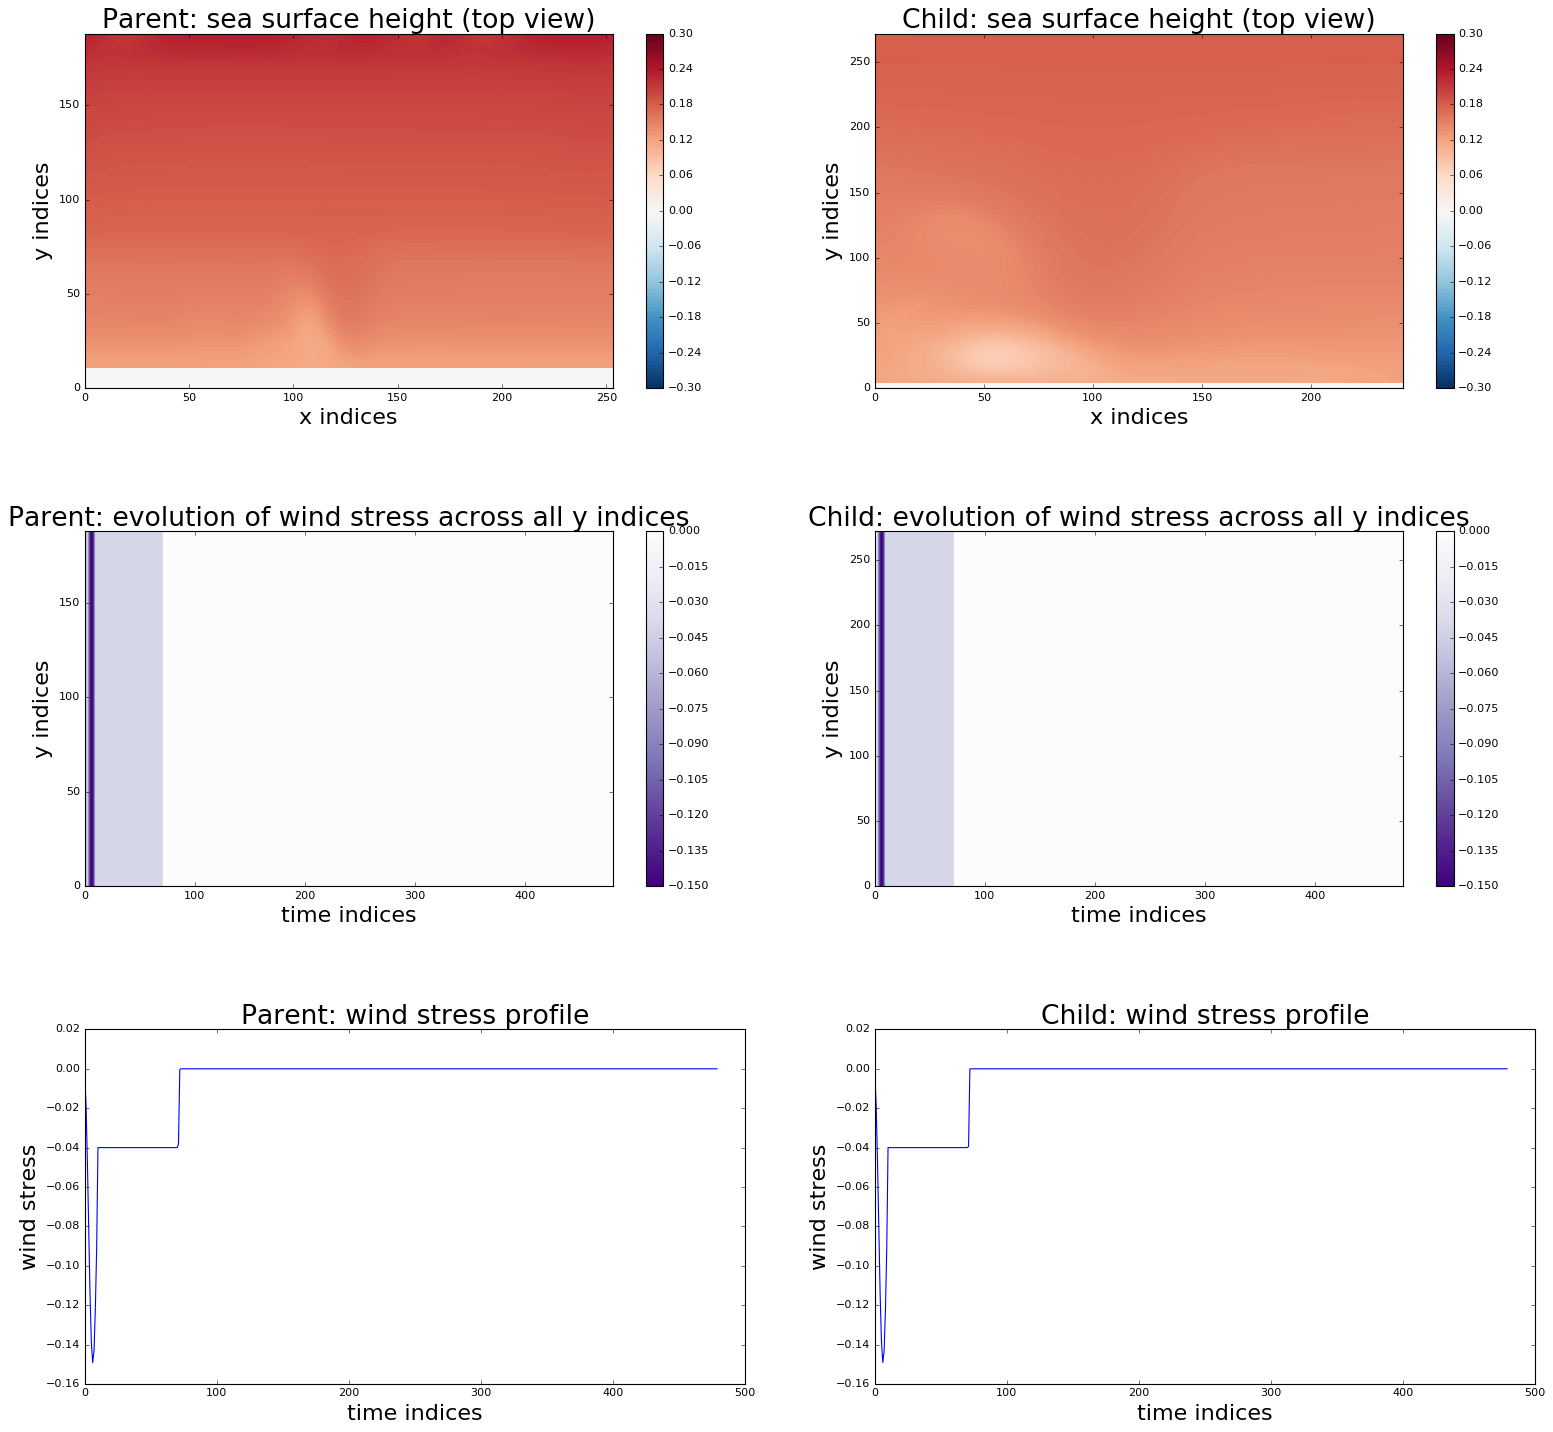

In [30]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3,2,figsize=(20, 18))

for ax, ssh, version in zip([ax1, ax2], [sossheigP, sossheigC], ['Parent', 'Child']):
    cmap = plt.get_cmap(cm.RdBu_r)
    p = ax.pcolormesh(ssh[:,:], vmin=-0.3, vmax=0.3, cmap=cmap)
    ax.set_xlabel('x indices', fontsize=20)
    ax.set_ylabel('y indices', fontsize=20)
    ax.set_xlim([0, ssh.shape[-1]])
    ax.set_ylim([0, ssh.shape[0]])
    fig.colorbar(p, ax=ax)
    ax.set_title(version + ': sea surface height (top view)', fontsize=24)

for ax, stress, version in zip([ax3, ax4], [sozotauxP, sozotauxC], ['Parent', 'Child']):    
    cmap = plt.get_cmap(cm.Purples_r)
    cross_ind = int(stress.shape[-1]/2)
    p = ax.pcolormesh(np.transpose(stress[:, :, cross_ind]), vmin=0, vmax=-0.15, cmap=cmap)
    ax.set_xlabel('time indices', fontsize=20)
    ax.set_ylabel('y indices', fontsize=20)
    ax.set_xlim([0, stress.shape[0]])
    ax.set_ylim([0, stress.shape[1]])
    fig.colorbar(p, ax=ax)
    ax.set_title(version + ': evolution of wind stress across all y indices', fontsize=24)
    
for ax, stress, version in zip([ax5, ax6], [sozotauxP, sozotauxC], ['Parent', 'Child']): 
    ax.plot(stress[:, 100, cross_ind])
    ax.set_xlabel('time indices', fontsize=20)
    ax.set_ylabel('wind stress', fontsize=20)
    ax.set_title(version + ': wind stress profile', fontsize=24)
    
plt.tight_layout(h_pad=7, w_pad=2)

### Depth Profiles: Parent and Child, Top and Bottom

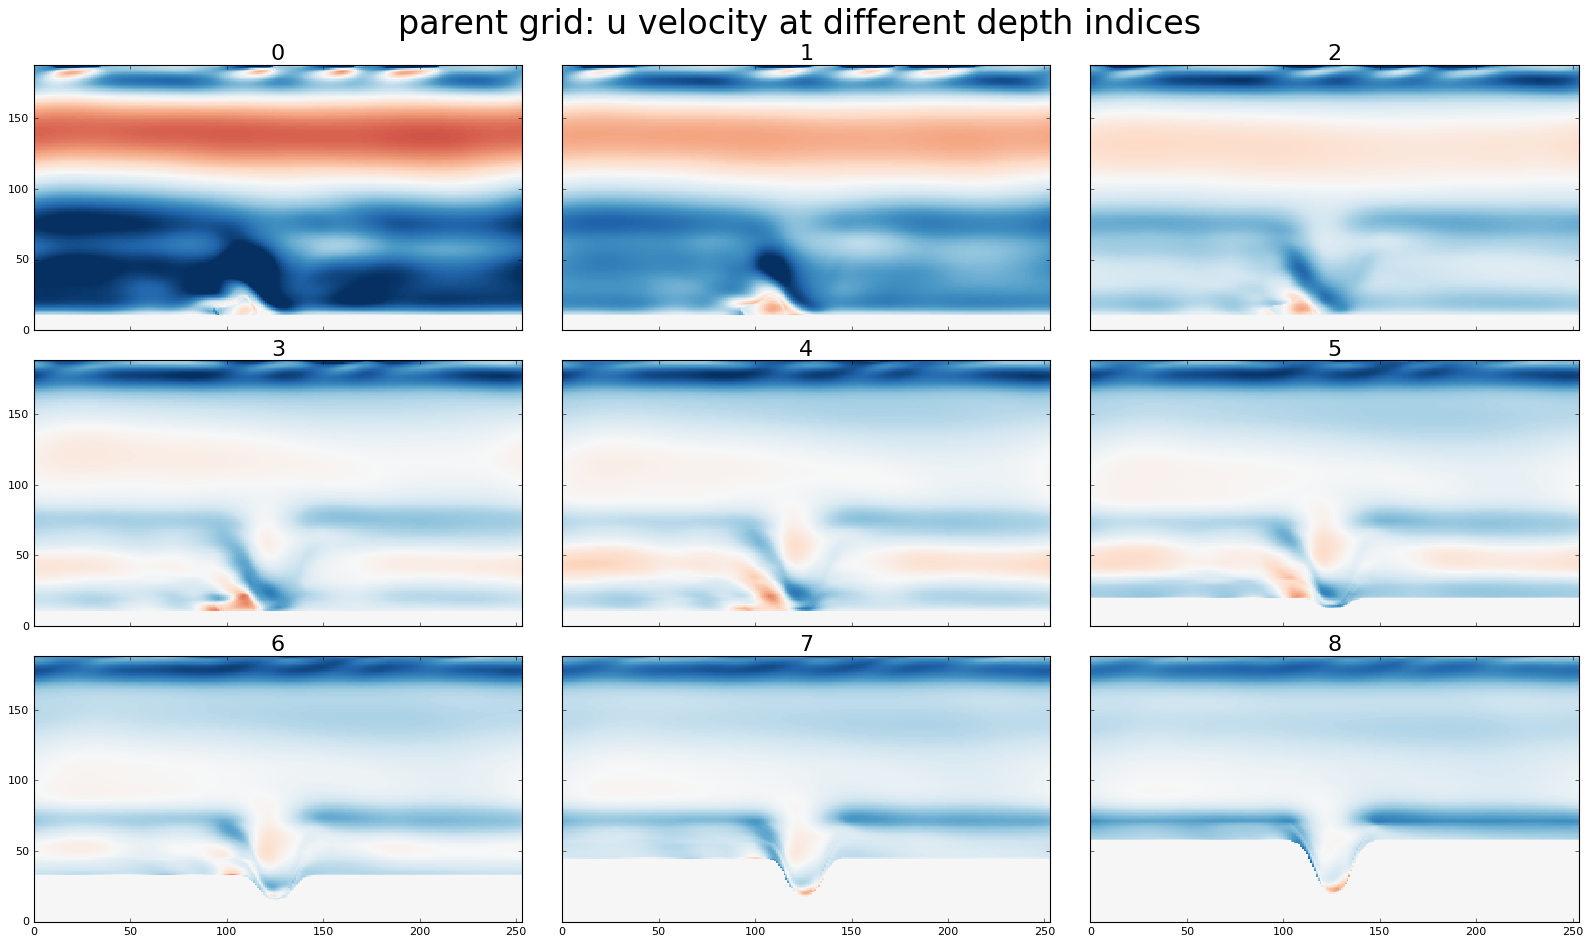

In [31]:
fig = plot_profiles(vozocrtxP, 'parent', np.arange(9), 0.06)

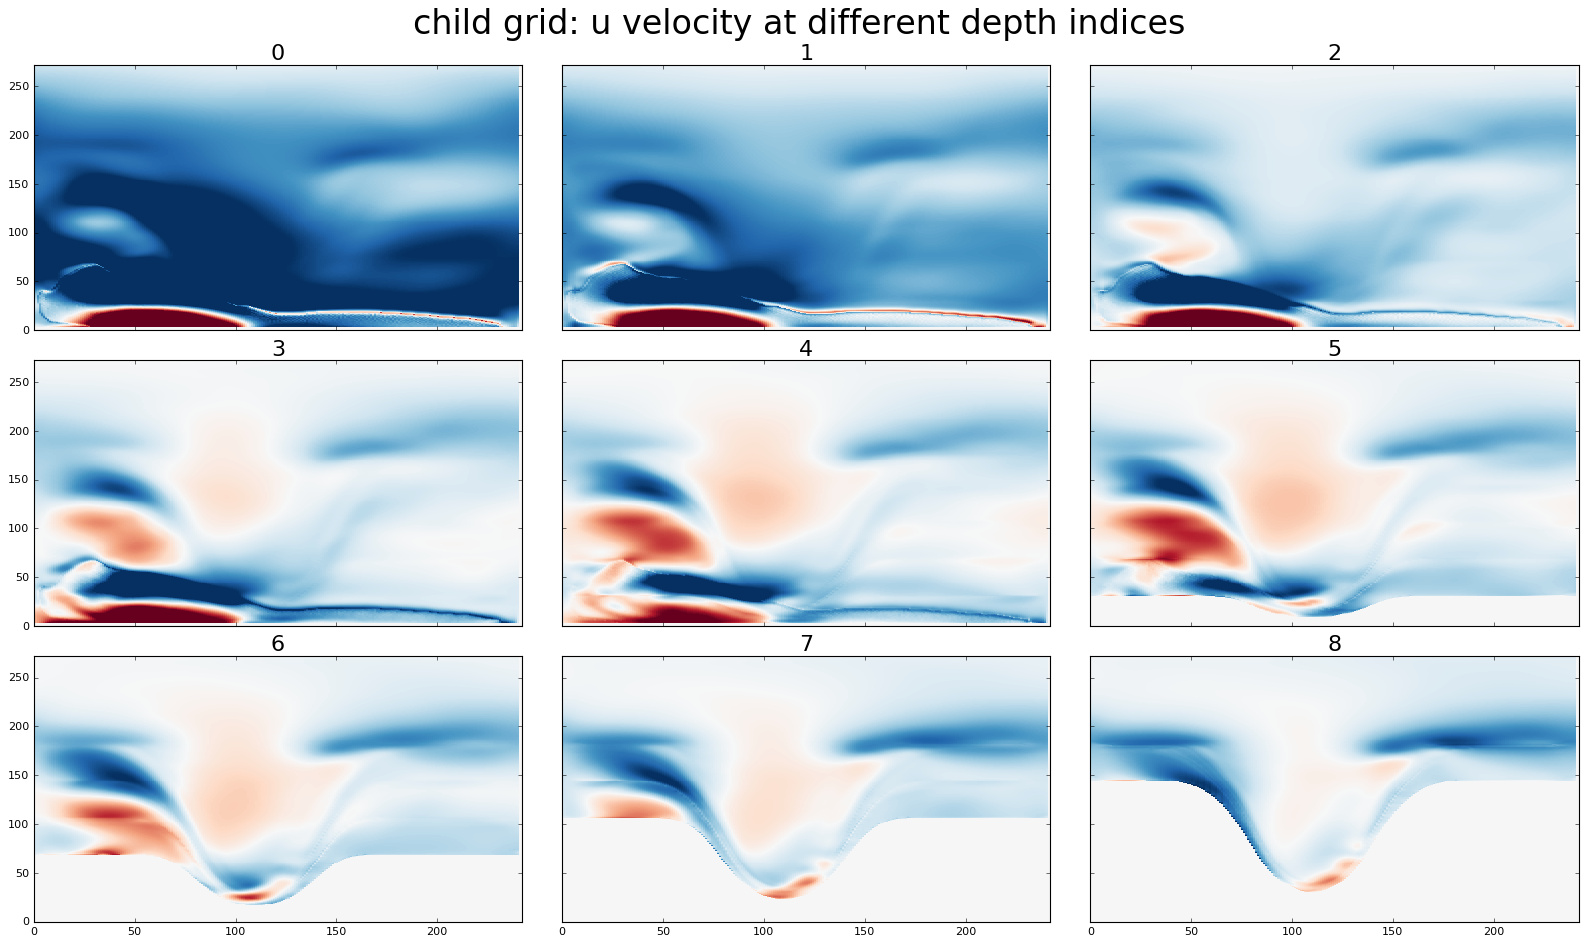

In [32]:
fig = plot_profiles(vozocrtxC, 'child', np.arange(9), 0.06)

### Cross-sections: Parent and Child, U, V, W, Temperature

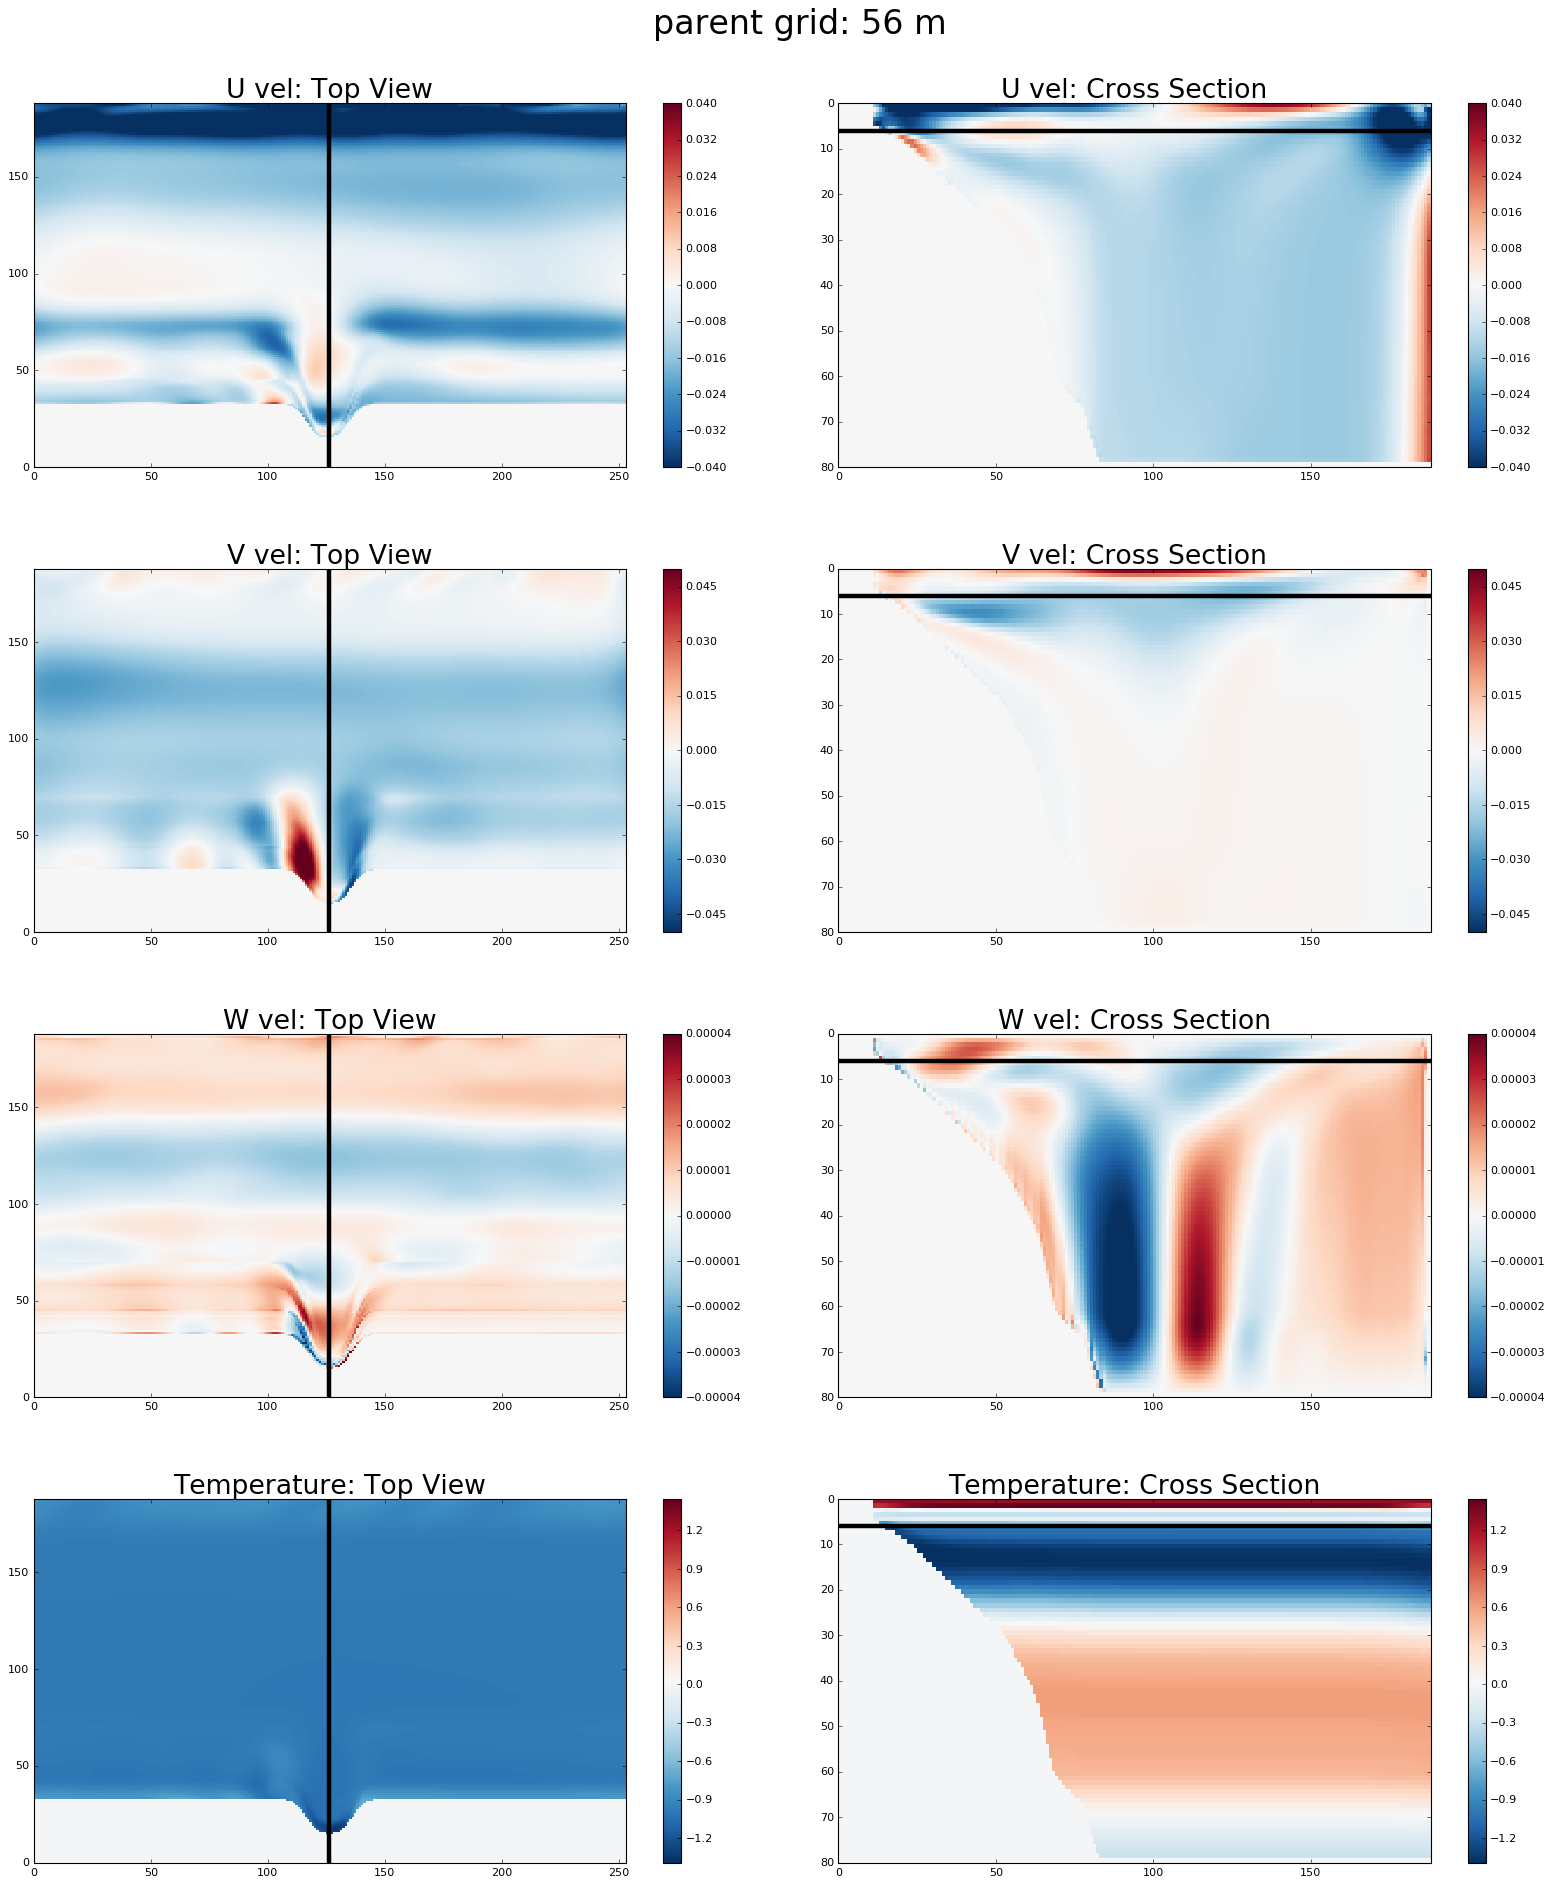

In [33]:
vmb = [0.04, 0.05, 0.00004]

version = 'parent'
depth_ind = 6
suptitle = version + ' grid: ' + str(int(depthtP[depth_ind])) + ' m'
fig = plot_cross_section(vozocrtxP, vomecrtyP, vovecrtzP, votemperP, depth_ind, suptitle, version, vmb)

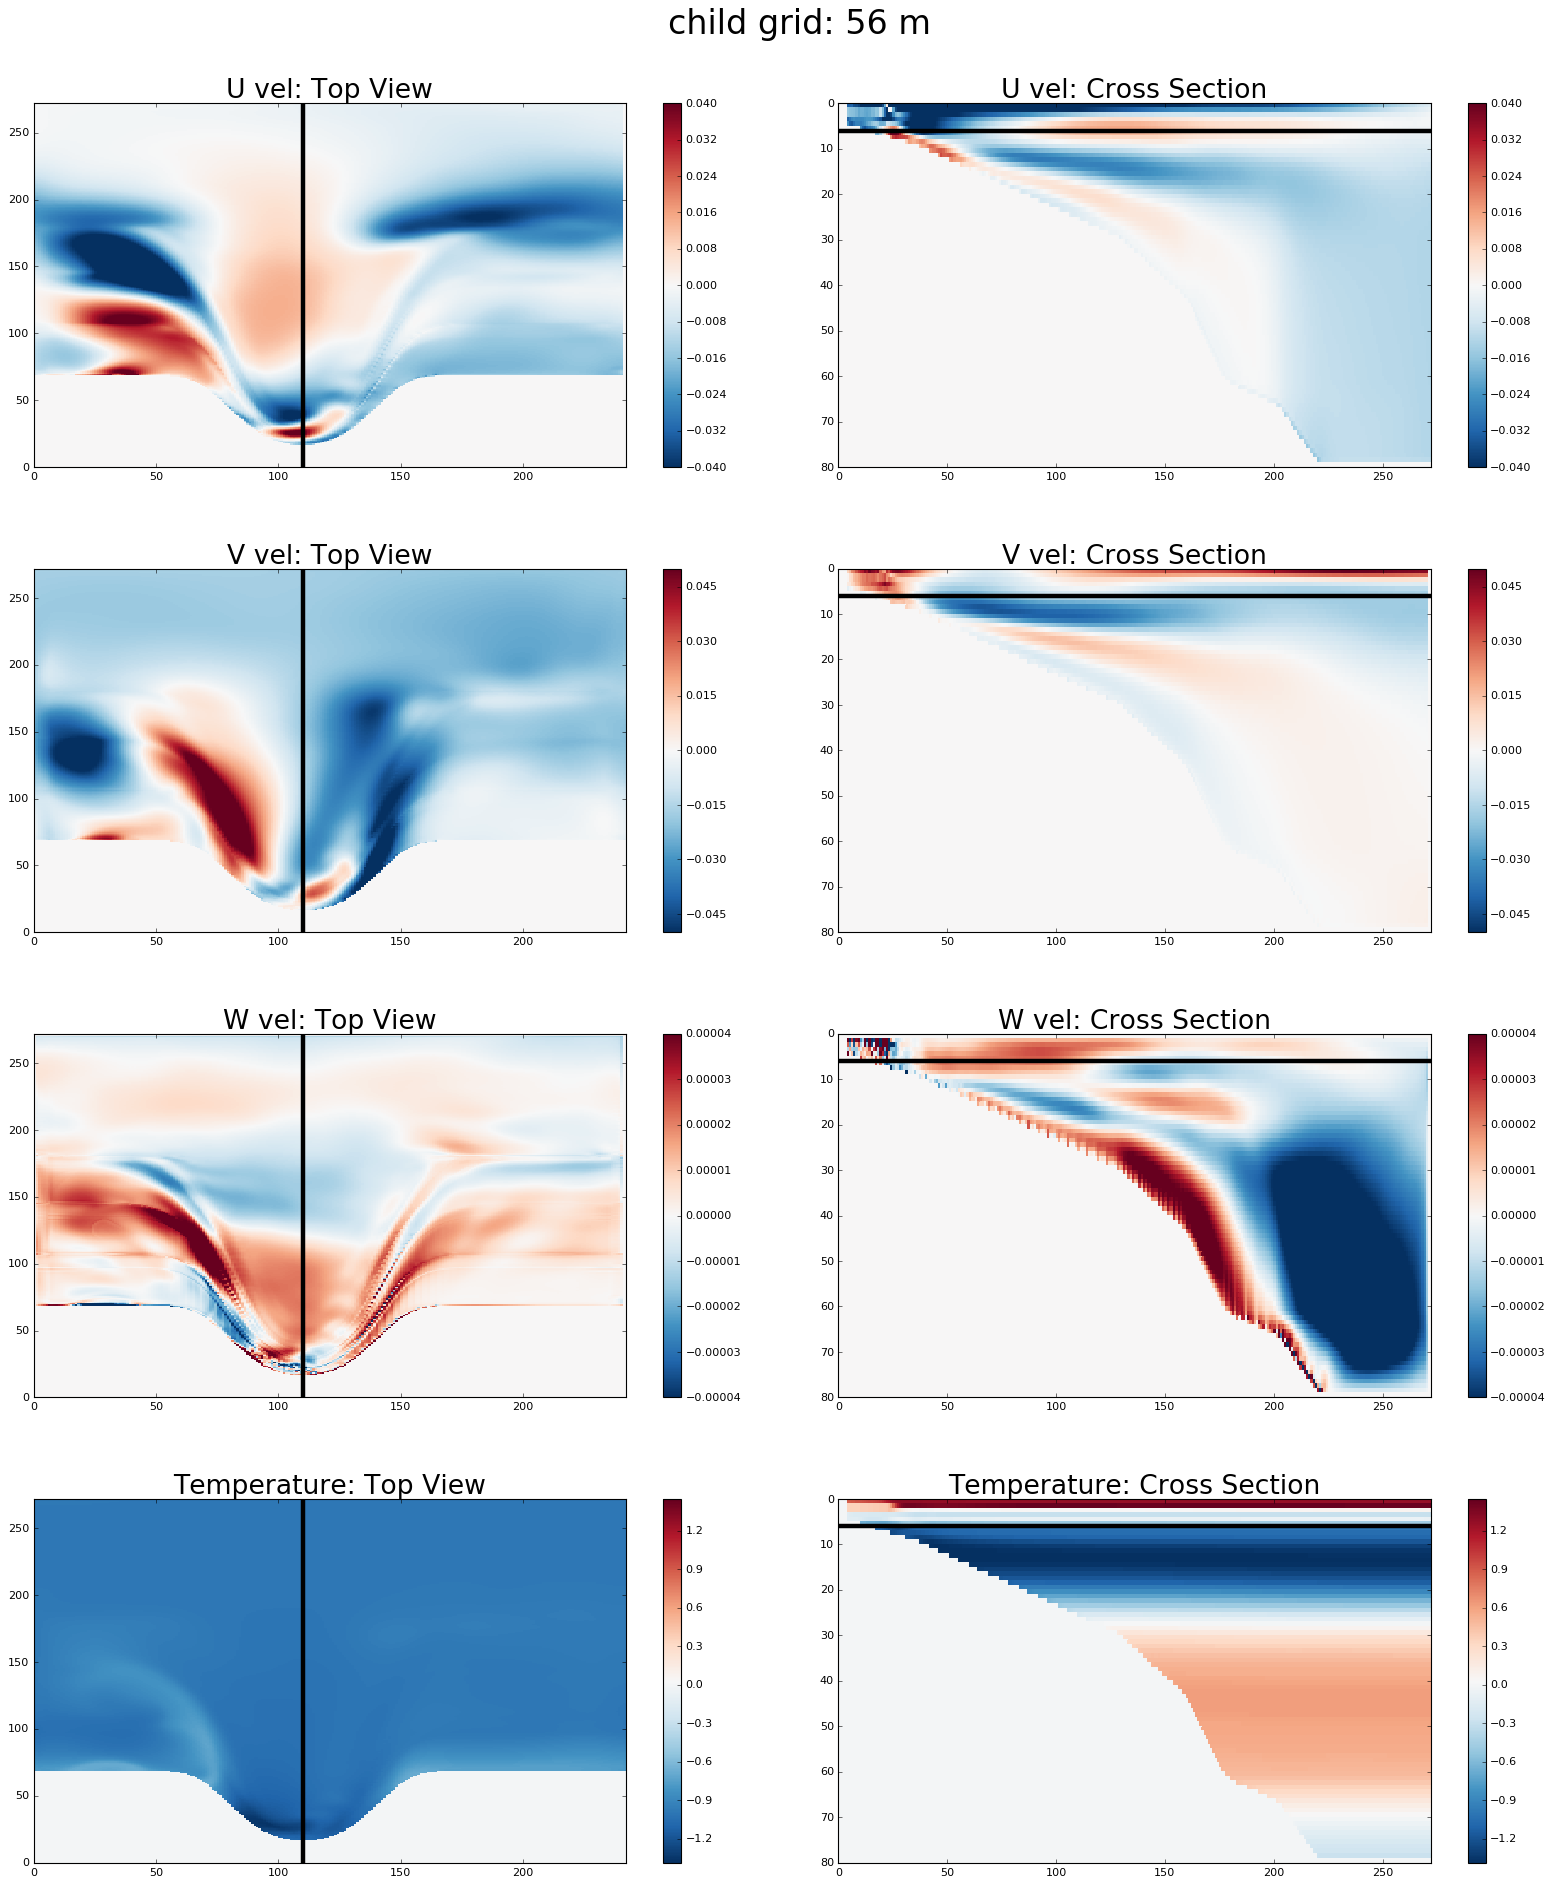

In [34]:
version = 'child'
depth_ind = 6
suptitle = version + ' grid: ' + str(int(depthtC[depth_ind])) + ' m'
fig = plot_cross_section(vozocrtxC, vomecrtyC, vovecrtzC, votemperC, depth_ind, suptitle, version, vmb)

### Closer look at U

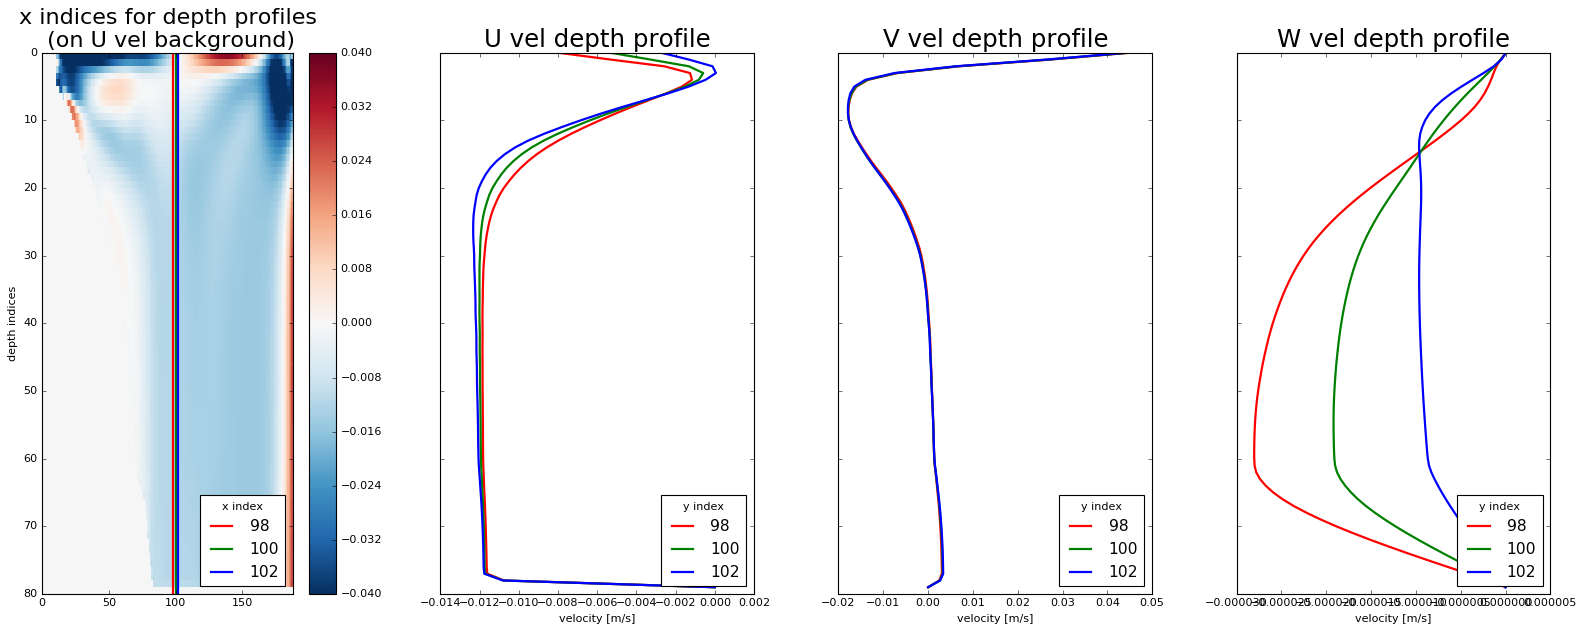

In [35]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20, 8), sharey=True)
cross_indP = int(vozocrtxP.shape[-1]/2)
ys = [98, 100, 102]    
p = ax1.pcolormesh(vozocrtxP[:,:,cross_indP], vmin=-0.04, vmax=0.04, cmap=plt.get_cmap(cm.RdBu_r))
ax1.axvline(ys[0], linewidth=2, c='r', label=str(ys[0]))
ax1.axvline(ys[1], linewidth=2, c='g', label=str(ys[1]))
ax1.axvline(ys[2], linewidth=2, c='b', label=str(ys[2]))
ax1.invert_yaxis()
fig.colorbar(p, ax=ax1)
ax1.set_ylabel('depth indices')
ax1.set_label('y indices')
ax1.legend(loc=4, title='x index', fontsize=14)
ax1.set_xlim([0, vozocrtxP.shape[1]])
ax1.set_title('x indices for depth profiles\n (on U vel background)', fontsize=20)

for ax, vel, ttl in zip([ax2, ax3, ax4], [vozocrtxP, vomecrtyP, vovecrtzP], ['U', 'V', 'W']):
    ax.plot(vel[:,ys[0],cross_indP], np.arange(vel.shape[0]), linewidth=2, c='r', label=str(ys[0]))
    ax.plot(vel[:,ys[1],cross_indP], np.arange(vel.shape[0]), linewidth=2, c='g', label=str(ys[1]))
    ax.plot(vel[:,ys[2],cross_indP], np.arange(vel.shape[0]), linewidth=2, c='b', label=str(ys[2]))
    ax.set_xlabel('velocity [m/s]')
    ax.legend(loc=4, title='y index', fontsize=14)
    ax.set_title(ttl + ' vel depth profile', fontsize=22)
plt.tight_layout(w_pad=3)